#Trabalho prático da disciplina de Teoria da Computação

**Alunos:** Ana Powarchuk Xavier, Emillyn Mellyne Gobetti Souza, Giovanna Alves Gadelha e Willian de Vargas

# 01. Execute a célula abaixo para importar as bibliotecas necessárias para a execução do código.

In [ ]:
#Bibliotecas
from IPython.display import clear_output # Pra limpar o output
from google.colab import files

# 02. Execute a célula abaixo para a compilação das funções de configuração e de teste do autômato.

In [ ]:
#Função de Configuração via arquivo
def configura_transicoes_arquivo():

  tabela_transicao = {} # Cria e inicializa um dicionário de dados, que vai armazenar a tabela de transições
  print("### SELECIONE O ARQUIVO .TXT CONTENDO A CONFIGURAÇÃO DO AUTÔMATO ###")
  uploaded = files.upload() # Upload do arquivo

  #Laço que percorre o arquivo, linha por linha, armazenando os parâmetros da configuração no dicionário que serve como tabela de transições
  with open(next(iter(uploaded))) as file:
    for line in file:
        line = line.rstrip("\n") #Remove a marcação de quebra de linha
        linha = line.split(',') #Transforma a string em um array, separando os elementos pelas vírgulas
        tabela_transicao[linha[0], linha[1]] = linha[2] # Insere entrada no dicionário que armazena a tabela de transição -> [estado, caractere] = prox_estado
  print("### Configuração do autômato informada ###")
  print(tabela_transicao)
  return tabela_transicao #Retorna um dicionário com a tabela de transições de estados


#Função que realiza o teste da sentença no automato configurado
def testa_automato_finito_deterministico(transicao_estados, estado, estados_finais, sentenca):
  
  #Laço que percorre a sentença
  for s in sentenca:
    
    #Testa se existe essa combinação de transição na tabela de transições previamente configurada
    if((estado, s) in transicao_estados):
      # Caso exista, o próximo estado é armazenado na variável estado
      estado = transicao_estados[(estado, s)]
    else:
      #Caso não exista, encerra a função
      return False
  
  #Ao final, é verificado se o ultimo estado onde chegamos está na relação de estados finais. (Retorna True ou False)
  return estado in estados_finais


# 03. Execute a célula abaixo para inserir a configuração do Autômato:
Para inserir a configuração do autômato, crie um arquivo .txt com o seguinte formato de preenchimento:

-> estado atual,caractere reconhecido, próximo estado

Obs: Os valores devem ser separados por vírgula e não devem conter espaços.

**Exemplo:**

Para representar o seguinte autômato:

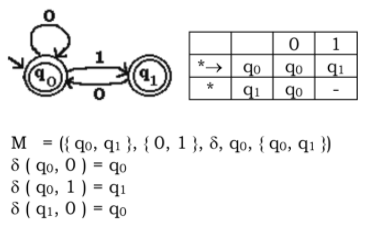

O arquivo .txt deve possuir o seguinte conteúdo:

q0,0,q0

q0,1,q1

q1,0,q0


In [ ]:
tabela_transição_estados = configura_transicoes_arquivo()

### SELECIONE O ARQUIVO .TXT CONTENDO A CONFIGURAÇÃO DO AUTÔMATO ###


Saving config_automato_2.txt to config_automato_2 (1).txt
### Configuração do autômato informada ###
{('q0', 'a'): 'q1', ('q0', 'b'): 'q2', ('q1', 'a'): 'q3', ('q1', 'b'): 'q2', ('q2', 'a'): 'q1', ('q2', 'b'): 'q3', ('q3', 'a'): 'q3', ('q3', 'b'): 'q3'}


# 04. Execute a célula abaixo para informar o Estado Inicial e o(os) Estado(s) Final(is)
Os estados inicial e finais devem ser informados de acordo com os estados contidos no arquivo inserido anteriormente.

**Obs.:** Caso exista mais de um estado final, estes devem ser separados por vírgula e sem espaços --> Ex.: q0,q1

In [ ]:
estado_inicial = input("Informe o estado inicial: ") # Realiza a leitura do estado inicial
estados_finais_aux = input("Informe os estados finais (em caso de mais de um estado final, separe-os com vírgula): ") #Realiza a leitura dos estados finais
estados_finais = estados_finais_aux.split(",")

Informe o estado inicial: q0
Informe os estados finais (em caso de mais de um estado final, separe-os com vírgula): q3


# 05. Execute a célula abaixo para informar a sentença a ser testada.

In [36]:
#Captura a sentença para teste
sentenca = input("Informe a sentença para teste: ")

#Execução da função
resultado = testa_automato_finito_deterministico(tabela_transição_estados, estado_inicial, estados_finais, sentenca)

if(resultado):
  print("A sentença '%s' FOI reconhecida pelo Autômato!" % sentenca)
else:
  print("A sentença '%s' NÃO FOI reconhecida pelo Autômato!" % sentenca)

Informe a sentença para teste: aba
A sentença 'aba' NÃO FOI reconhecida pelo Autômato!
